In [41]:
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt
from glob import glob

# File Paths 

In [42]:
train_path = glob('training/*/*.jpg')
test_path = glob('validation/*/*.jpg')
evlauation_path = glob('evaluation/*/*.jpg')

In [57]:
folders = glob('training/*')
K = len(folders)
int(K)

2

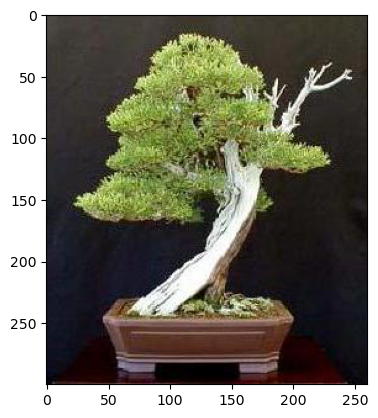

In [44]:
## Import a random image for testing 

plt.imshow(tf.keras.preprocessing.image.load_img(np.random.choice(train_path)))
plt.show;

# Using the keras library to call a pre-trained model called the VGG-16

In [47]:
IMAGE_SHAPE = [200, 200]
ptm = tf.keras.applications.vgg16.VGG16(
    input_shape=IMAGE_SHAPE + [3],
    weights='imagenet',
    include_top=False,
    
)
IMAGE_SHAPE + [3]

[200, 200, 3]

In [53]:
## we dont want to re-train the pre-trained vgg16 model so we use the following code 

ptm.trainable = False

In [58]:
x = tf.keras.layers.Flatten()(ptm.output)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(inputs=ptm.input, outputs=x)

In [59]:
## Looking at all the layers of the model in brief
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

# Data Augmentation

In [60]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=.2,
    height_shift_range=.2,
    horizontal_flip=True,
    rotation_range=.1,
    shear_range=.2,
    zoom_range=.2
)

In [61]:
## Train data gen

train_gen = gen.flow_from_directory(
    'training',
    target_size=IMAGE_SHAPE,
    batch_size=128,
    shuffle=True,
)

# Test data gen

test_gen = gen.flow_from_directory(
    'validation',
    target_size=IMAGE_SHAPE,
    batch_size=128
)

len(train_gen), len(test_gen)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(24, 8)

# Running the model on the datasets..

In [62]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_gen, validation_data=test_gen, steps_per_epoch=len(train_gen), validation_steps=len(test_gen), epochs=10)

Epoch 1/10


2024-02-02 22:06:59.702273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 2.7681 - accuracy: 0.8710

2024-02-02 22:07:41.728977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 56s 2s/step - loss: 2.7681 - accuracy: 0.8710 - val_loss: 1.4953 - val_accuracy: 0.9350
Epoch 2/10
24/24 [==============================] - 58s 2s/step - loss: 1.4898 - accuracy: 0.9363 - val_loss: 2.1102 - val_accuracy: 0.9250
Epoch 3/10
24/24 [==============================] - 69s 3s/step - loss: 0.9851 - accuracy: 0.9527 - val_loss: 1.3930 - val_accuracy: 0.9420
Epoch 4/10
24/24 [==============================] - 68s 3s/step - loss: 0.8566 - accuracy: 0.9517 - val_loss: 1.5447 - val_accuracy: 0.9370
Epoch 5/10
24/24 [==============================] - 67s 3s/step - loss: 0.8086 - accuracy: 0.9607 - val_loss: 2.0655 - val_accuracy: 0.9320
Epoch 6/10
24/24 [==============================] - 73s 3s/step - loss: 0.9195 - accuracy: 0.9500 - val_loss: 1.7540 - val_accuracy: 0.9350
Epoch 7/10
24/24 [==============================] - 71s 3s/step - loss: 0.9241 - accuracy: 0.9633 - val_loss: 1.7443 - val_accuracy: 0.9420
Epoch 8/10
24/24 [=============

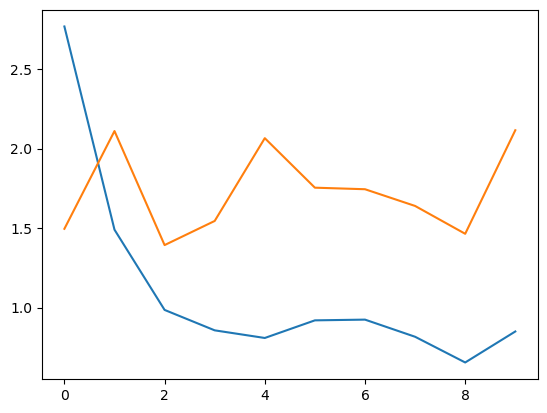

In [63]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show();

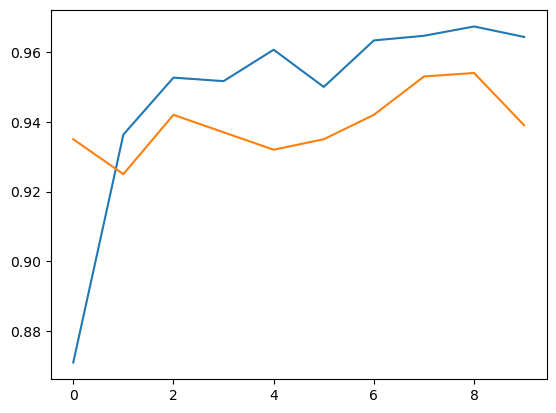

In [64]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.show();